In [1]:
#Importing the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#importing the dataset 
df = pd.read_csv(r"C:\Users\HP\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv") 


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.shape 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

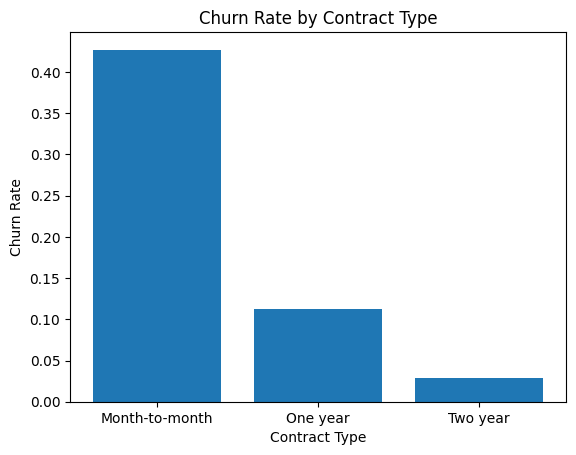

In [6]:
churn_contract = (
    df.groupby('Contract')['Churn']
    .value_counts(normalize=True)
    .rename('rate')
    .reset_index()
)

churn_contract = churn_contract[churn_contract['Churn'] == 'Yes']

plt.bar(churn_contract['Contract'], churn_contract['rate'])
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.show()


OBSERVATION: Here the month to month contract type has more number of churn 


C:\Users\HP\AppData\Local\Temp\ipykernel_6544\751388237.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tenure_churn_yes, tenure_churn_no], labels=['Churned', 'Not Churned'])


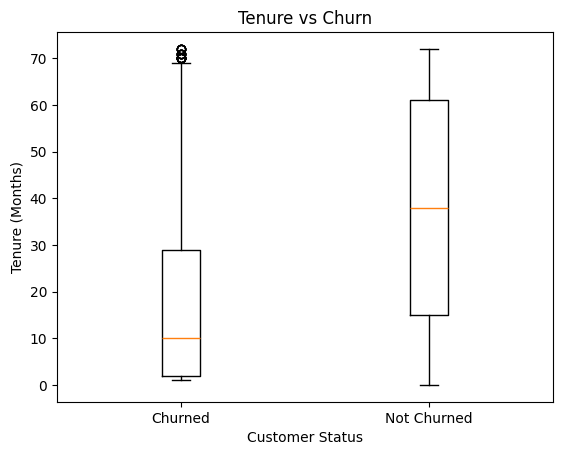

In [7]:
tenure_churn_yes = df[df['Churn'] == 'Yes']['tenure']
tenure_churn_no = df[df['Churn'] == 'No']['tenure']

plt.boxplot([tenure_churn_yes, tenure_churn_no], labels=['Churned', 'Not Churned'])
plt.xlabel('Customer Status')
plt.ylabel('Tenure (Months)')
plt.title('Tenure vs Churn')
plt.show()


OBSERVATION : The new customers are more likely to leave or churn

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_6544\3178658327.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([charges_churn_yes, charges_churn_no], labels=['Churned', 'Not Churned'])


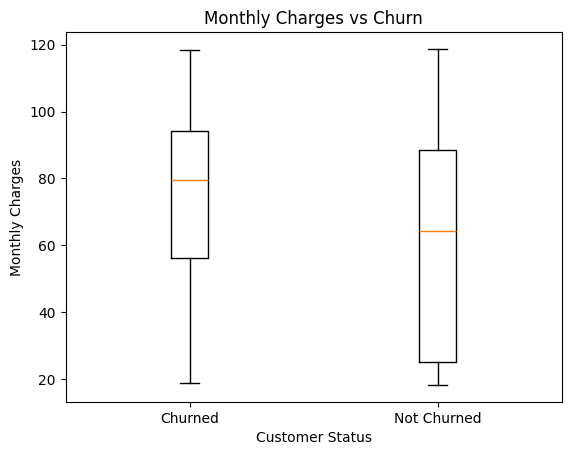

In [9]:
charges_churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
charges_churn_no = df[df['Churn'] == 'No']['MonthlyCharges']

plt.boxplot([charges_churn_yes, charges_churn_no], labels=['Churned', 'Not Churned'])
plt.xlabel('Customer Status')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs Churn')
plt.show()


OBSERVATION : THE PREMIUM USERS ARE MORE LIKELY TO CHURN

In [10]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


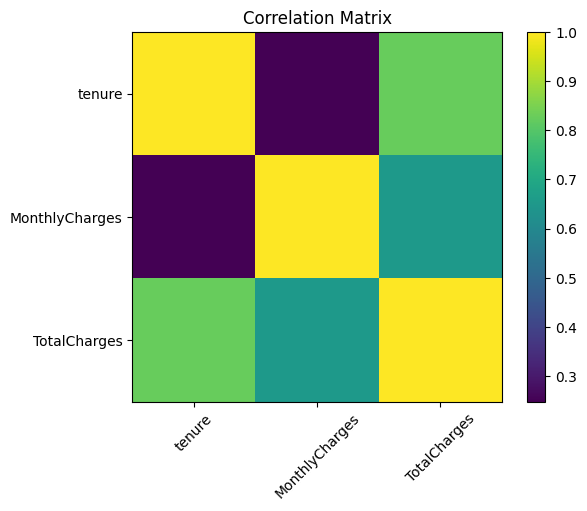

In [11]:

corr = df[['tenure', 'MonthlyCharges','TotalCharges']].corr()

plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Matrix')
plt.show()


In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
#Now i can start the feature engineering 
df.isna().sum() 
df.drop('customerID',axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
#Creating a pipeline for the preproccesing of the numerical columns 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler

In [15]:
steps = [('Impute_median',SimpleImputer(missing_values=np.nan,strategy='median')) , ('scalar',StandardScaler())] 
numerical_preprocessor = Pipeline(steps)

In [16]:
numerical_preprocessor

Pipeline(steps=[('Impute_median', SimpleImputer(strategy='median')),
                ('scalar', StandardScaler())])

In [17]:
#Creating the pipeline for the categorical column 
from sklearn.preprocessing import OneHotEncoder 
steps_1 = [('encoding',OneHotEncoder(handle_unknown='ignore'))] 
categorical_preprocessing = Pipeline(steps_1) 

In [18]:
categorical_preprocessing 

Pipeline(steps=[('encoding', OneHotEncoder(handle_unknown='ignore'))])

In [19]:
from sklearn.compose import ColumnTransformer 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
from sklearn.compose import ColumnTransformer

numerical_cols = ['SeniorCitizen', 'tenure', 'TotalCharges', 'MonthlyCharges']

categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

preprocessing = ColumnTransformer(
    transformers=[
        ('numerical', numerical_preprocessor, numerical_cols),
        ('categorical', categorical_preprocessing, categorical_cols)
    ]
)


In [21]:
preprocessing

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('Impute_median',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'TotalCharges',
                                  'MonthlyCharges']),
                                ('categorical',
                                 Pipeline(steps=[('encoding',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [22]:
from sklearn.linear_model import LogisticRegression
steps = [('preprocessing',preprocessing) , ('classifier',LogisticRegression())]
model = Pipeline(steps)

In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42) 

In [26]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('Impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'TotalCharges',
                                                   'MonthlyCharges']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression())])

In [28]:
model.score(X_test,y_test) * 100 

81.72043010752688

In [31]:
from sklearn.metrics import confusion_matrix, classification_report


In [32]:
y_pred = model.predict(X_test) 

In [33]:
cm=confusion_matrix(y_pred,y_test) 
classification = classification_report(y_pred,y_test)

In [34]:
cm

array([[1529,  257],
       [ 168,  371]])

In [35]:
classification

'              precision    recall  f1-score   support\n\n          No       0.90      0.86      0.88      1786\n         Yes       0.59      0.69      0.64       539\n\n    accuracy                           0.82      2325\n   macro avg       0.75      0.77      0.76      2325\nweighted avg       0.83      0.82      0.82      2325\n'

In [37]:
#Now creating another model with the DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

In [38]:
steps_2 = [('Preprocessing',preprocessing) , ('DecisonTreeClassiffier',DecisionTreeClassifier())] 
model2 = Pipeline(steps_2)

In [39]:
model2.fit(X_train,y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('Impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'TotalCharges',
                                                   'MonthlyCharges']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('DecisonTreeClassiffier', DecisionTreeClassifier())])

In [40]:
model2.score(X_test,y_test) * 100 

0.733763440860215

In [41]:
ypred_2 = model2.predict(X_test) 

In [42]:
confusion_matrix(ypred_2,y_test) 

array([[1387,  309],
       [ 310,  319]])

In [43]:
classification_report(ypred_2,y_test)

'              precision    recall  f1-score   support\n\n          No       0.82      0.82      0.82      1696\n         Yes       0.51      0.51      0.51       629\n\n    accuracy                           0.73      2325\n   macro avg       0.66      0.66      0.66      2325\nweighted avg       0.73      0.73      0.73      2325\n'

In [44]:
#Now using the RandomForestclassifier 
from sklearn.ensemble import RandomForestClassifier

In [45]:
steps_3 = [('preprocessing',preprocessing) , ('RandomForestClassifier',RandomForestClassifier())]
model3 = Pipeline(steps_3)

In [46]:
model3.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('Impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'TotalCharges',
                                                   'MonthlyCharges']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('RandomForestClassifier', RandomForestClassifier())])

In [47]:
model3.score(X_test,y_test)

0.7944086021505377

In [51]:
ypred_3 = model3.predict(X_test) 

In [52]:
confusion_matrix(y_pred,y_test) 

array([[1529,  257],
       [ 168,  371]])

In [53]:
classification_report(ypred_3,y_test)

'              precision    recall  f1-score   support\n\n          No       0.91      0.83      0.87      1855\n         Yes       0.49      0.66      0.56       470\n\n    accuracy                           0.79      2325\n   macro avg       0.70      0.74      0.72      2325\nweighted avg       0.82      0.79      0.80      2325\n'

CONCLUSION : 
           BY COMPARING THE ABOVE THREE MODELS I CAN USE THE LOGISTICREGRESSION MODEL FOR THIS PARTICULAR CHUNKS PREDICTING MODEL WITH THE ALMOST 82% ACCURACY